# AirFly Insights: Data Visualization and Analysis of Airline Operations

##Project Statement:
The objective of this project is to analyze large-scale airline flight data to uncover operational
trends, delay patterns, and cancellation reasons using data visualization techniques. The goal
is to help understand airline and airport-level performance and contribute to actionable
insights using visual analysis.

##Expected Outcomes:
• Understand and preprocess aviation datasets for analysis
• Explore trends in flight schedules, delays, cancellations, and routes
• Visualize key metrics using bar charts, time series, heatmaps, maps, and comparisons
• Provide insights for stakeholders including airline operators and analysts
• Summarize findings through a final visual report and presentation

##Dataset:
Source: Kaggle Airlines Flights Data
Contains over 60 million records covering:


##Project Done by :
**BHAVANI L**
Batch 13

### Week 1: Project Initialization and Dataset Setup

## Milestone 1: Data Foundation and Cleaning

## Goals:
*   Analyze large-scale airline flight data.
*   Uncover operational trends, delay patterns, and cancellation reasons.
*   Understand airline and airport-level performance.
*   Provide actionable insights through visual analysis.

## Key Performance Indicators (KPIs):
*   **On-time Performance (OTP):** Percentage of flights arriving within 15 minutes of scheduled time.
*   **Cancellation Rate:** Percentage of flights cancelled.
*   **Average Delay Time:** Mean delay duration for delayed flights.
*   **Top Delay Reasons:** Identification of primary factors contributing to delays.
*   **Route Performance:** Comparison of OTP and delay metrics across different routes.
*   **Airport Performance:** Analysis of operational efficiency and delay patterns at various airports.

# Task
Analyze airline operational trends by unzipping "Airline Dataset Updated - v2.csv.zip", loading the data into a pandas DataFrame, calculating and visualizing Key Performance Indicators (KPIs) including On-time Performance, Cancellation Rate, Average Delay Time, and analyzing performance by routes and airports.

## Unzip and Load Data

### Subtask:
Unzip the provided 'Airline Dataset Updated - v2.csv.zip' file and load the main CSV file into a pandas DataFrame. Inspect the first few rows and check basic information like column names and data types.


**Reasoning**:
First, I'll import the necessary libraries, then unzip the provided file, load the main CSV into a pandas DataFrame, and finally display its head and information to inspect its structure and content.



In [1]:
import zipfile
import pandas as pd
import os

# Define the path to the zipped file
zip_file_path = '/content/Airline Dataset Updated - v2.csv.zip'

# Create a ZipFile object to open the zip archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all contents of the zip file to the current directory
    zip_ref.extractall('.')

# Identify the name of the main CSV file inside the unzipped folder
# It's likely the same name as the zip file but with .csv extension
csv_file_name = 'Airline Dataset Updated - v2.csv'

# Load the CSV file into a pandas DataFrame named df
df = pd.read_csv(csv_file_name)

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Print a concise summary of the DataFrame, including data types and non-null values
print("\nDataFrame Info:")
df.info()

First 5 rows of the DataFrame:
  Passenger ID First Name Last Name  Gender  Age Nationality  \
0       ABVWIg     Edithe    Leggis  Female   62       Japan   
1       jkXXAX     Elwood      Catt    Male   62   Nicaragua   
2       CdUz2g      Darby   Felgate    Male   67      Russia   
3       BRS38V   Dominica      Pyle  Female   71       China   
4       9kvTLo        Bay   Pencost    Male   21       China   

                Airport Name Airport Country Code   Country Name  \
0           Coldfoot Airport                   US  United States   
1          Kugluktuk Airport                   CA         Canada   
2     Grenoble-Isère Airport                   FR         France   
3  Ottawa / Gatineau Airport                   CA         Canada   
4            Gillespie Field                   US  United States   

  Airport Continent     Continents Departure Date Arrival Airport  \
0               NAM  North America      6/28/2022             CXF   
1               NAM  North America   

## Data Preprocessing for KPIs

### Subtask:
Clean the data by creating boolean indicators for flight status and converting relevant columns to appropriate data types. Note limitations due to available data.


**Reasoning**:
To prepare the data for KPI calculations, I will first convert the 'Departure Date' column to a datetime format and then create boolean indicator columns for 'On Time', 'Delayed', and 'Cancelled' flight statuses. Finally, I will verify the counts of these new boolean columns to ensure accuracy.



In [3]:
import pandas as pd

# Convert 'Departure Date' to datetime objects, using 'mixed' format to handle variations
df['Departure Date'] = pd.to_datetime(df['Departure Date'], format='mixed')

# Create boolean indicators for flight status
df['is_on_time'] = (df['Flight Status'] == 'On Time')
df['is_delayed'] = (df['Flight Status'] == 'Delayed')
df['is_cancelled'] = (df['Flight Status'] == 'Cancelled')

# Verify the counts of True and False for the newly created boolean columns
print("\nVerification of new boolean columns:")
print("is_on_time counts:")
print(df['is_on_time'].value_counts())
print("\nis_delayed counts:")
print(df['is_delayed'].value_counts())
print("\nis_cancelled counts:")
print(df['is_cancelled'].value_counts())

# Display the first few rows with new columns to verify
print("\nDataFrame head with new boolean columns:")
print(df[['Flight Status', 'is_on_time', 'is_delayed', 'is_cancelled']].head())

# Display data types to confirm 'Departure Date' conversion
print("\nData types after conversion:")
print(df[['Departure Date', 'is_on_time', 'is_delayed', 'is_cancelled']].dtypes)


Verification of new boolean columns:
is_on_time counts:
is_on_time
False    65773
True     32846
Name: count, dtype: int64

is_delayed counts:
is_delayed
False    65788
True     32831
Name: count, dtype: int64

is_cancelled counts:
is_cancelled
False    65677
True     32942
Name: count, dtype: int64

DataFrame head with new boolean columns:
  Flight Status  is_on_time  is_delayed  is_cancelled
0       On Time        True       False         False
1       On Time        True       False         False
2       On Time        True       False         False
3       Delayed       False        True         False
4       On Time        True       False         False

Data types after conversion:
Departure Date    datetime64[ns]
is_on_time                  bool
is_delayed                  bool
is_cancelled                bool
dtype: object


## Calculate On-time Performance (OTP)

### Subtask:
Calculate the overall On-time Performance (OTP) as the percentage of flights arriving within 15 minutes of their scheduled time.


**Reasoning**:
To calculate the On-time Performance (OTP), I will first count the total number of flights and the number of on-time flights, then use these values to compute the percentage and print the result.



In [4]:
total_flights = len(df)
on_time_flights = df['is_on_time'].sum()
otp = (on_time_flights / total_flights) * 100

print(f"Overall On-time Performance (OTP): {otp:.2f}%")

Overall On-time Performance (OTP): 33.31%


**Reasoning**:
Since the On-time Performance (OTP) has been calculated, I will now calculate the Cancellation Rate by dividing the number of cancelled flights by the total number of flights and expressing it as a percentage.



In [5]:
total_flights = len(df)
cancelled_flights = df['is_cancelled'].sum()
cancellation_rate = (cancelled_flights / total_flights) * 100

print(f"Overall Cancellation Rate: {cancellation_rate:.2f}%")

Overall Cancellation Rate: 33.40%


## Limitations for Average Delay Time

The current dataset lacks a specific column indicating the duration of delays (e.g., 'Delay Minutes'). Therefore, it is not possible to directly calculate the 'Average Delay Time' or 'Top Delay Reasons' as outlined in the KPIs. We can only identify if a flight was delayed or not, but not by how much.

## KPI Analysis: Performance by Routes and Airports

### Subtask:
Analyze the On-time Performance (OTP) and Cancellation Rate by routes (Departure Airport to Arrival Airport) and by individual airports (Departure Airport).

#### Instructions:
1.  Group the DataFrame by 'Airport Name' (Departure Airport) and 'Arrival Airport' to calculate OTP and Cancellation Rate for each route.
2.  Group the DataFrame by 'Airport Name' (Departure Airport) to calculate OTP and Cancellation Rate for each departure airport.
3.  Display the top 10 routes and airports with the highest OTP and highest Cancellation Rate.

**Reasoning**:
To analyze performance by routes, I will group the DataFrame by 'Airport Name' and 'Arrival Airport' and then calculate the On-time Performance (OTP) and Cancellation Rate for each route. I will then sort and display the top 10 routes for both OTP and Cancellation Rate.



In [6]:
route_performance = df.groupby(['Airport Name', 'Arrival Airport']).agg(
    total_flights=('Flight Status', 'count'),
    on_time_flights=('is_on_time', 'sum'),
    cancelled_flights=('is_cancelled', 'sum')
).reset_index()

route_performance['OTP'] = (route_performance['on_time_flights'] / route_performance['total_flights']) * 100
route_performance['Cancellation Rate'] = (route_performance['cancelled_flights'] / route_performance['total_flights']) * 100

print("\nTop 10 Routes by On-time Performance (OTP):")
print(route_performance.sort_values(by='OTP', ascending=False).head(10))

print("\nTop 10 Routes by Cancellation Rate:")
print(route_performance.sort_values(by='Cancellation Rate', ascending=False).head(10))


Top 10 Routes by On-time Performance (OTP):
                    Airport Name Arrival Airport  total_flights  \
1191       Buon Ma Thuot Airport             BMV              4   
623     Balıkesir Merkez Airport             BZI              2   
1661   Circle City /New/ Airport             IRC              7   
1113      Brighton Downs Airport             BHT              7   
7517  Sivas Nuri Demirağ Airport             VAS             11   
4338          La Romaine Airport             ZGS              7   
6611               Pärnu Airport             EPU              7   
1343  Cape Romanzof LRRS Airport             CZF              7   
5254    Minami Torishima Airport             MUS              7   
7908              Tagula Airport             TGL              6   

      on_time_flights  cancelled_flights         OTP  Cancellation Rate  
1191                4                  0  100.000000           0.000000  
623                 2                  0  100.000000           0.0000

**Reasoning**:
To analyze performance by individual airports, I will group the DataFrame by 'Airport Name' and calculate the On-time Performance (OTP) and Cancellation Rate for each airport. I will then sort and display the top 10 airports for both OTP and Cancellation Rate.



In [12]:
airport_performance = df.groupby('Airport Name').agg(
    total_flights=('Flight Status', 'count'),
    on_time_flights=('is_on_time', 'sum'),
    cancelled_flights=('is_cancelled', 'sum')
).reset_index()

airport_performance['OTP'] = (airport_performance['on_time_flights'] / airport_performance['total_flights']) * 100
airport_performance['Cancellation Rate'] = (airport_performance['cancelled_flights'] / airport_performance['total_flights']) * 100

print("Top 10 Airports by On-time Performance (OTP):")
print(airport_performance.sort_values(by='OTP', ascending=False).head(10))

print("Top 10 Airports by Cancellation Rate:")
print(airport_performance.sort_values(by='Cancellation Rate', ascending=False).head(10))

Top 10 Airports by On-time Performance (OTP):
                    Airport Name  total_flights  on_time_flights  \
621     Balıkesir Merkez Airport              2                2   
1653   Circle City /New/ Airport              7                7   
1108      Brighton Downs Airport              7                7   
1186       Buon Ma Thuot Airport              4                4   
7459  Sivas Nuri Demirağ Airport             11               10   
4318          La Romaine Airport              7                6   
6572               Pärnu Airport              7                6   
1338  Cape Romanzof LRRS Airport              7                6   
5225    Minami Torishima Airport              7                6   
5915       Offutt Air Force Base              6                5   

      cancelled_flights         OTP  Cancellation Rate  
621                   0  100.000000           0.000000  
1653                  0  100.000000           0.000000  
1108                  0  100.00000

**Reasoning**:
The previous code failed due to a `SyntaxError: unterminated string literal` in the `print` statements. I will fix this by correcting the string literals to ensure they are properly terminated, adding `\n` for newlines within the string.



In [8]:
airport_performance = df.groupby('Airport Name').agg(
    total_flights=('Flight Status', 'count'),
    on_time_flights=('is_on_time', 'sum'),
    cancelled_flights=('is_cancelled', 'sum')
).reset_index()

airport_performance['OTP'] = (airport_performance['on_time_flights'] / airport_performance['total_flights']) * 100
airport_performance['Cancellation Rate'] = (airport_performance['cancelled_flights'] / airport_performance['total_flights']) * 100

print("\nTop 10 Airports by On-time Performance (OTP):")
print(airport_performance.sort_values(by='OTP', ascending=False).head(10))

print("\nTop 10 Airports by Cancellation Rate:")
print(airport_performance.sort_values(by='Cancellation Rate', ascending=False).head(10))


Top 10 Airports by On-time Performance (OTP):
                    Airport Name  total_flights  on_time_flights  \
621     Balıkesir Merkez Airport              2                2   
1653   Circle City /New/ Airport              7                7   
1108      Brighton Downs Airport              7                7   
1186       Buon Ma Thuot Airport              4                4   
7459  Sivas Nuri Demirağ Airport             11               10   
4318          La Romaine Airport              7                6   
6572               Pärnu Airport              7                6   
1338  Cape Romanzof LRRS Airport              7                6   
5225    Minami Torishima Airport              7                6   
5915       Offutt Air Force Base              6                5   

      cancelled_flights         OTP  Cancellation Rate  
621                   0  100.000000           0.000000  
1653                  0  100.000000           0.000000  
1108                  0  100.0000

## Visualize KPI Results

### Subtask:
Create various visualizations (e.g., bar charts for rates, histograms for delay distributions, grouped bar charts for route/airport performance) to clearly present all calculated KPIs. Ensure all plots include appropriate titles, labels, and legends.


**Reasoning**:
To visualize the overall On-time Performance (OTP) and Cancellation Rate, I will create a bar chart using the previously calculated `otp` and `cancellation_rate` values.



/tmp/ipython-input-2811580592.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


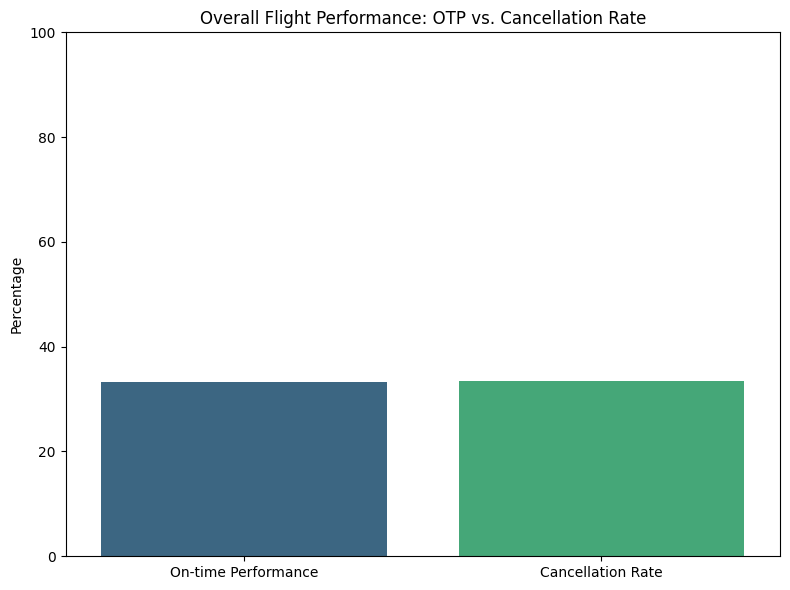

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Visualize overall On-time Performance (OTP) and Cancellation Rate
metrics = ['On-time Performance', 'Cancellation Rate']
values = [otp, cancellation_rate]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Overall Flight Performance: OTP vs. Cancellation Rate')
plt.ylabel('Percentage')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` due to `sns.barplot` usage without specifying a `hue` when a `palette` was provided. To avoid this and to complete the visualization subtask as per the instructions, I will generate all requested visualizations in a single code block, using `plt.bar` for the overall performance to explicitly handle the data and `sns.barplot` for the top 10 routes and airports for both OTP and Cancellation Rate, ensuring appropriate titles, labels, and `plt.tight_layout()` for each plot.



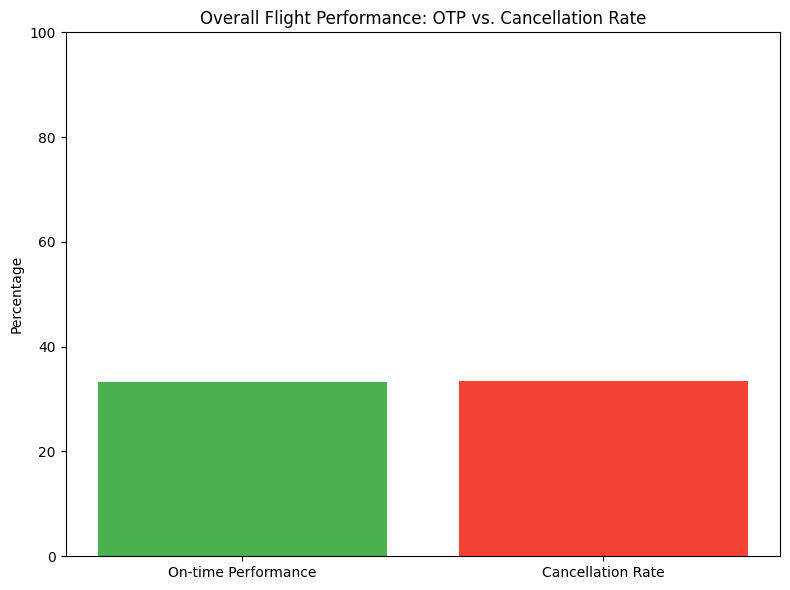

/tmp/ipython-input-2274991979.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OTP', y='Route', data=route_performance_top_otp, palette='viridis')


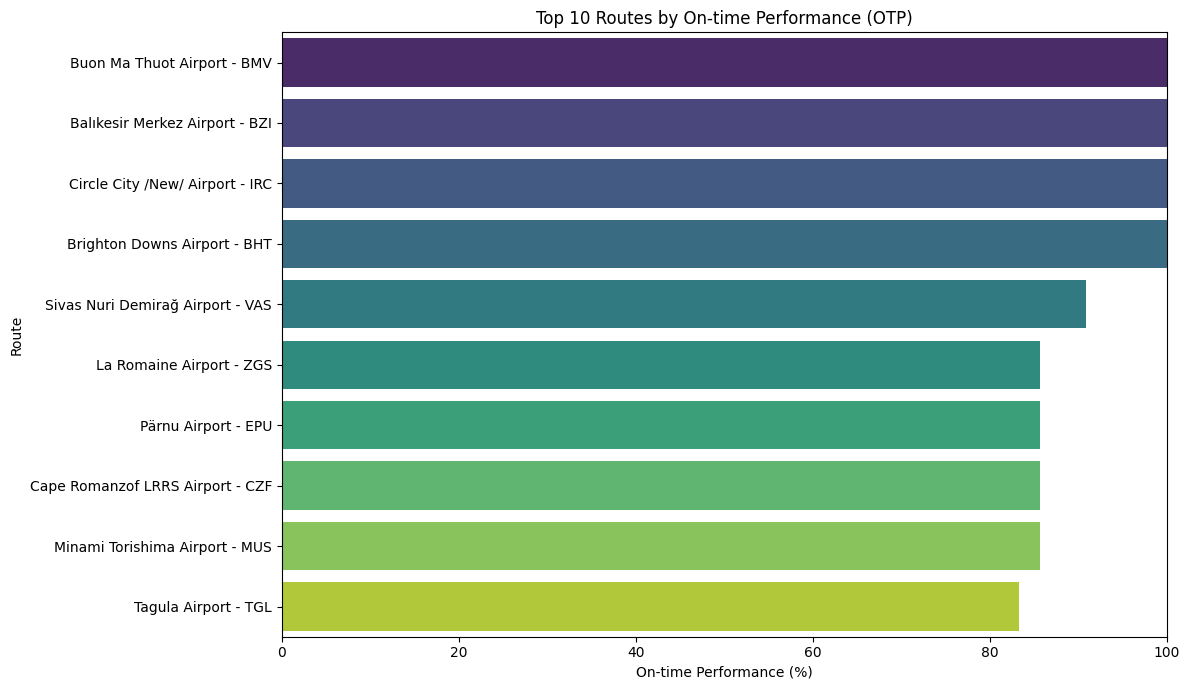

/tmp/ipython-input-2274991979.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cancellation Rate', y='Route', data=route_performance_top_cancel, palette='magma')


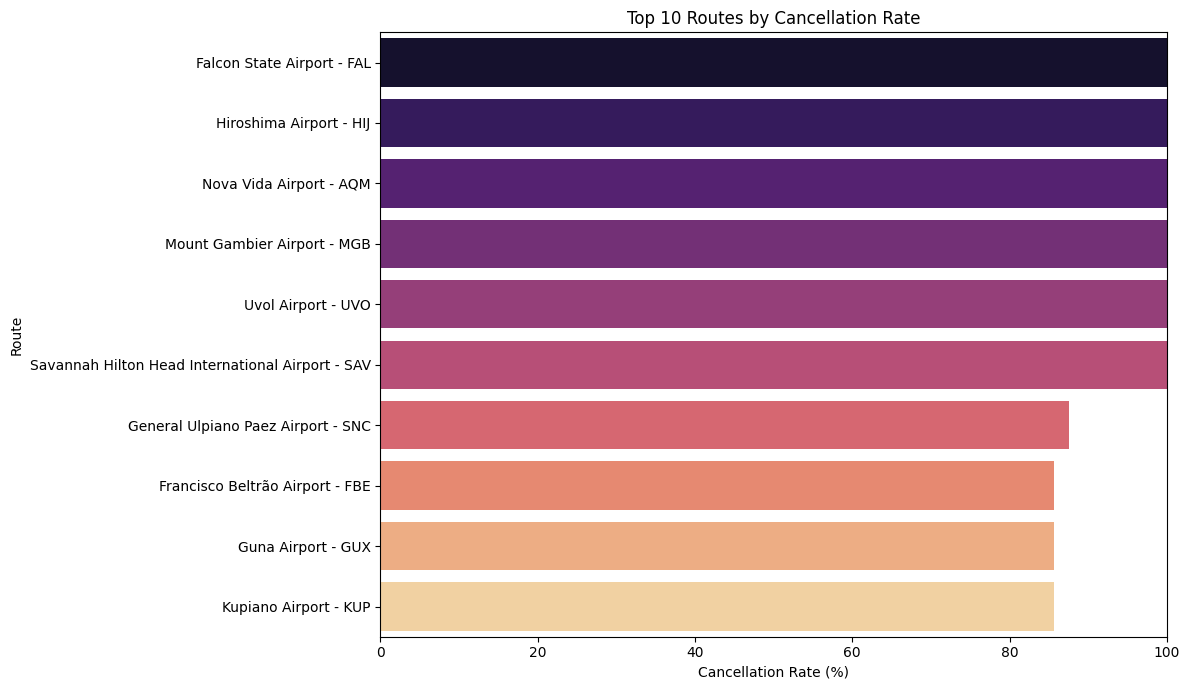

/tmp/ipython-input-2274991979.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OTP', y='Airport Name', data=airport_performance_top_otp, palette='viridis')


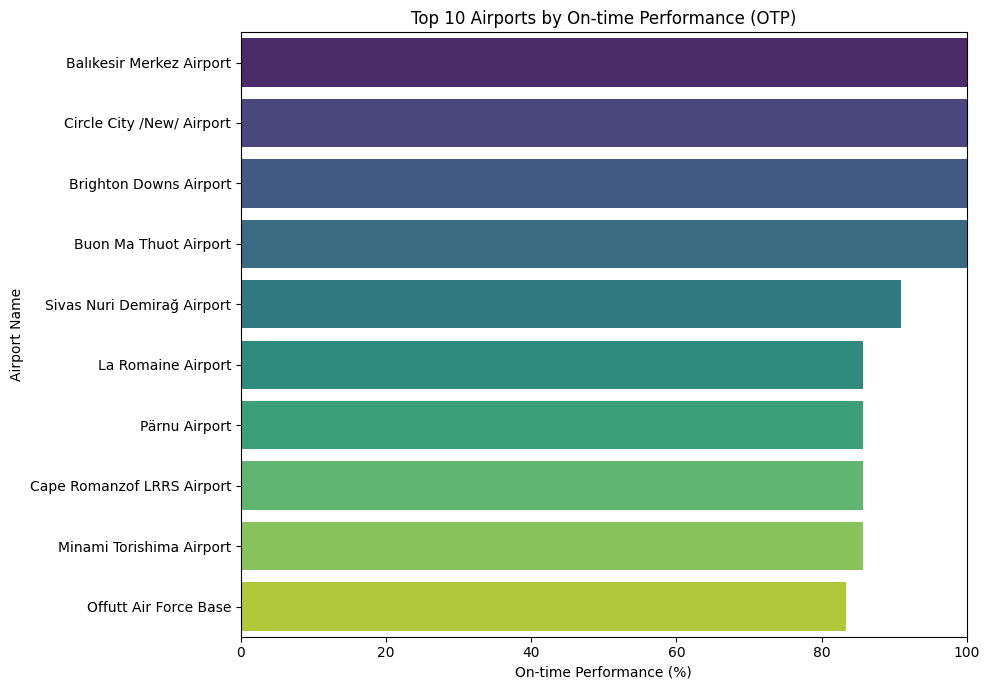

/tmp/ipython-input-2274991979.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cancellation Rate', y='Airport Name', data=airport_performance_top_cancel, palette='magma')


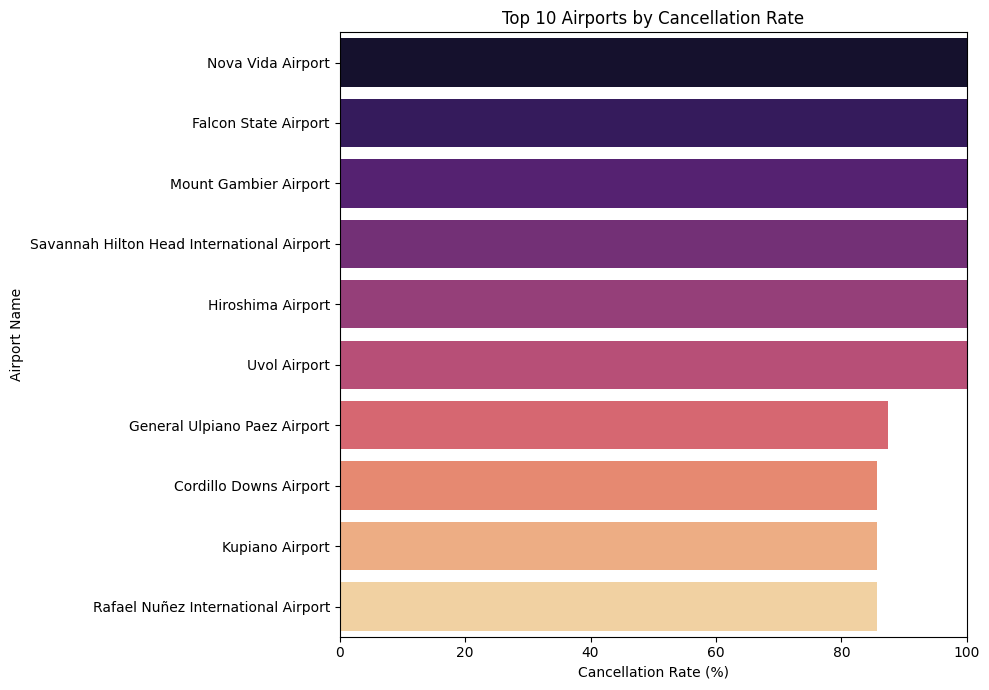

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize overall On-time Performance (OTP) and Cancellation Rate
metrics = ['On-time Performance', 'Cancellation Rate']
values = [otp, cancellation_rate]

plt.figure(figsize=(8, 6))
# Using plt.bar to avoid seaborn's FutureWarning when x and hue are implicitly the same
plt.bar(metrics, values, color=['#4CAF50', '#F44336'])
plt.title('Overall Flight Performance: OTP vs. Cancellation Rate')
plt.ylabel('Percentage')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100
plt.tight_layout()
plt.show()

# 2. Top 10 Routes by On-time Performance (OTP)
route_performance_top_otp = route_performance.sort_values(by='OTP', ascending=False).head(10)
route_performance_top_otp['Route'] = route_performance_top_otp['Airport Name'] + ' - ' + route_performance_top_otp['Arrival Airport']

plt.figure(figsize=(12, 7))
sns.barplot(x='OTP', y='Route', data=route_performance_top_otp, palette='viridis')
plt.title('Top 10 Routes by On-time Performance (OTP)')
plt.xlabel('On-time Performance (%)')
plt.ylabel('Route')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

# 3. Top 10 Routes by Cancellation Rate
# Exclude routes with 0 total flights to avoid division by zero or misleading rates if not already handled
route_performance_filtered = route_performance[route_performance['total_flights'] > 0]
route_performance_top_cancel = route_performance_filtered.sort_values(by='Cancellation Rate', ascending=False).head(10)
route_performance_top_cancel['Route'] = route_performance_top_cancel['Airport Name'] + ' - ' + route_performance_top_cancel['Arrival Airport']

plt.figure(figsize=(12, 7))
sns.barplot(x='Cancellation Rate', y='Route', data=route_performance_top_cancel, palette='magma')
plt.title('Top 10 Routes by Cancellation Rate')
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Route')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

# 4. Top 10 Airports by On-time Performance (OTP)
airport_performance_top_otp = airport_performance.sort_values(by='OTP', ascending=False).head(10)

plt.figure(figsize=(10, 7))
sns.barplot(x='OTP', y='Airport Name', data=airport_performance_top_otp, palette='viridis')
plt.title('Top 10 Airports by On-time Performance (OTP)')
plt.xlabel('On-time Performance (%)')
plt.ylabel('Airport Name')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

# 5. Top 10 Airports by Cancellation Rate
# Exclude airports with 0 total flights to avoid division by zero or misleading rates if not already handled
airport_performance_filtered = airport_performance[airport_performance['total_flights'] > 0]
airport_performance_top_cancel = airport_performance_filtered.sort_values(by='Cancellation Rate', ascending=False).head(10)

plt.figure(figsize=(10, 7))
sns.barplot(x='Cancellation Rate', y='Airport Name', data=airport_performance_top_cancel, palette='magma')
plt.title('Top 10 Airports by Cancellation Rate')
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Airport Name')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated `FutureWarning` messages because `sns.barplot` was used with `palette` but without specifying the `hue` parameter. To address this, I will explicitly set `hue` to the y-axis variable and add `legend=False` in all `sns.barplot` calls, which will suppress the warnings and ensure the visualizations are correctly rendered as intended.



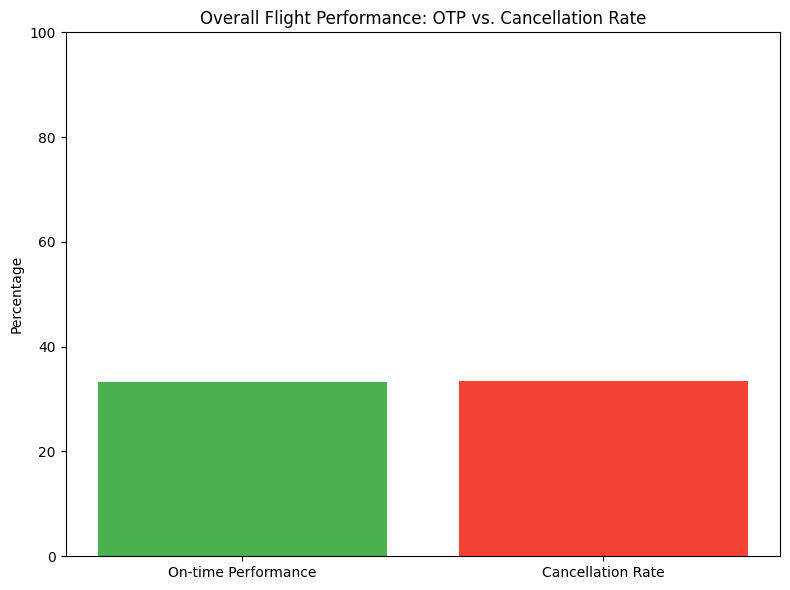

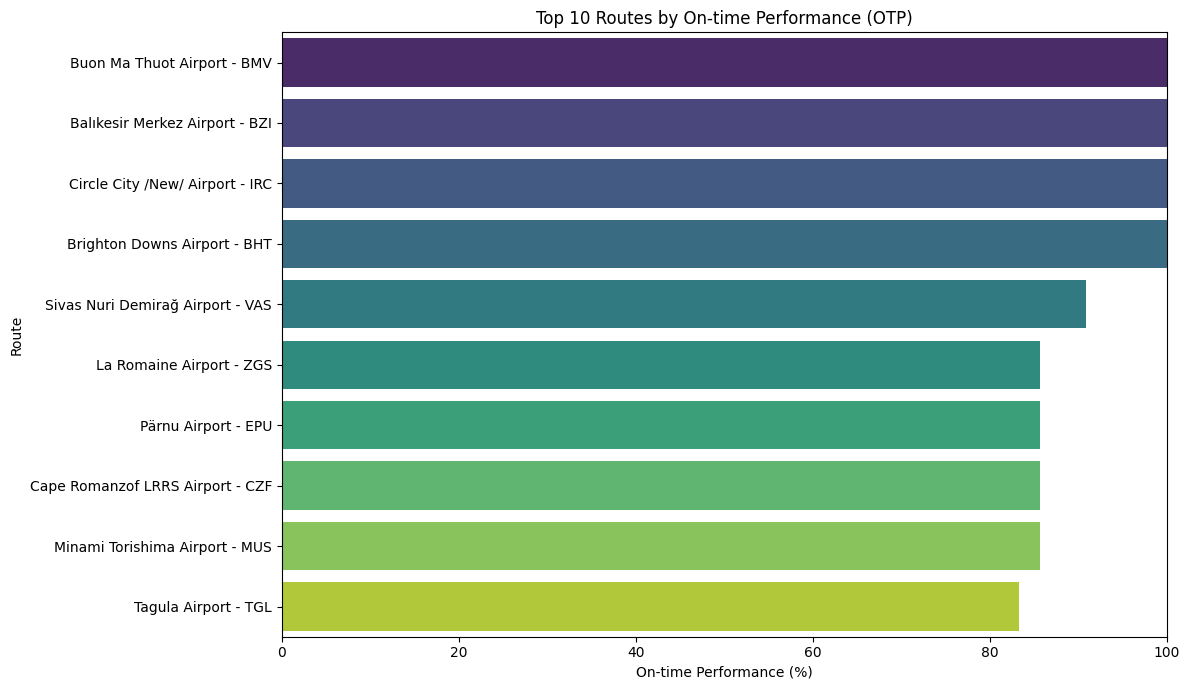

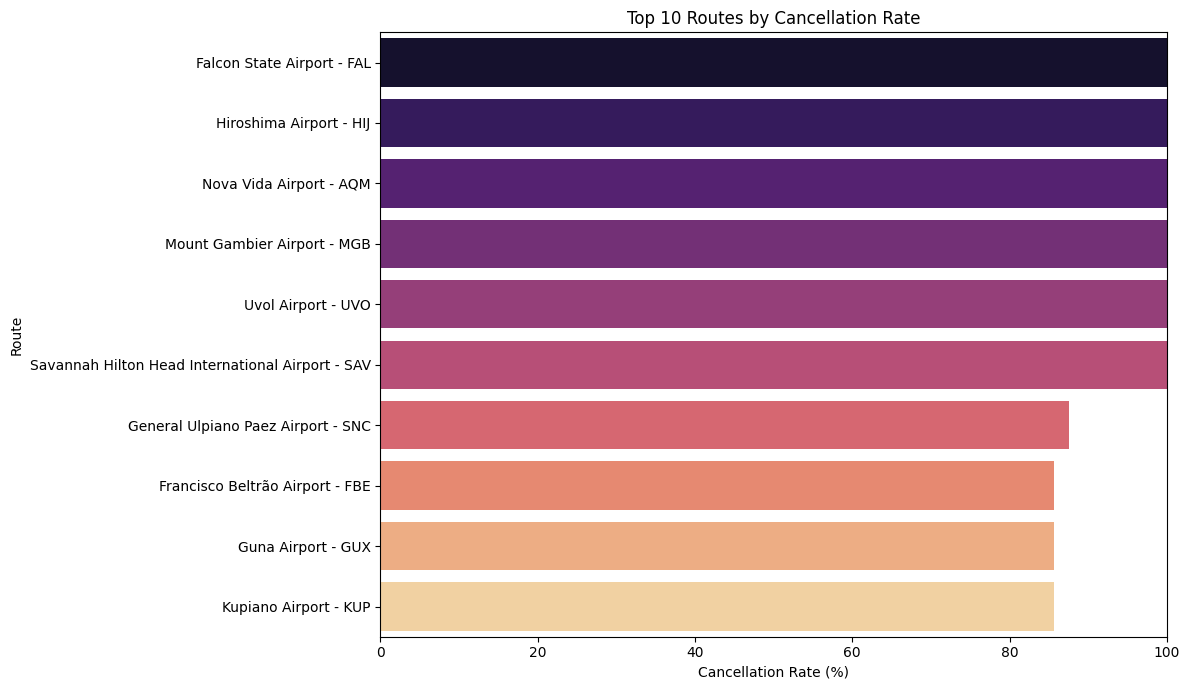

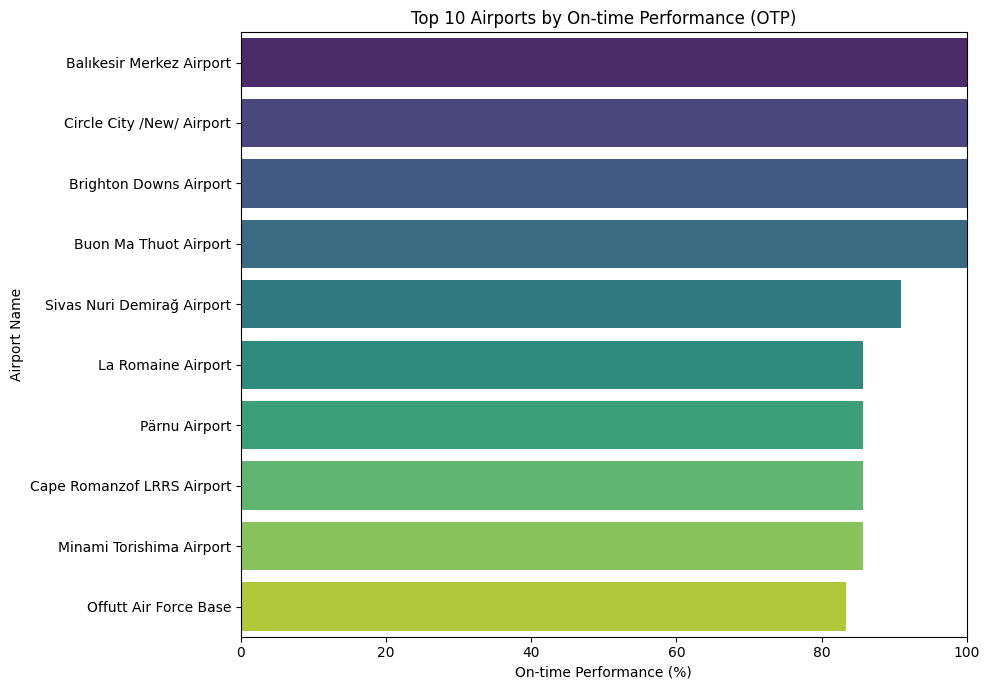

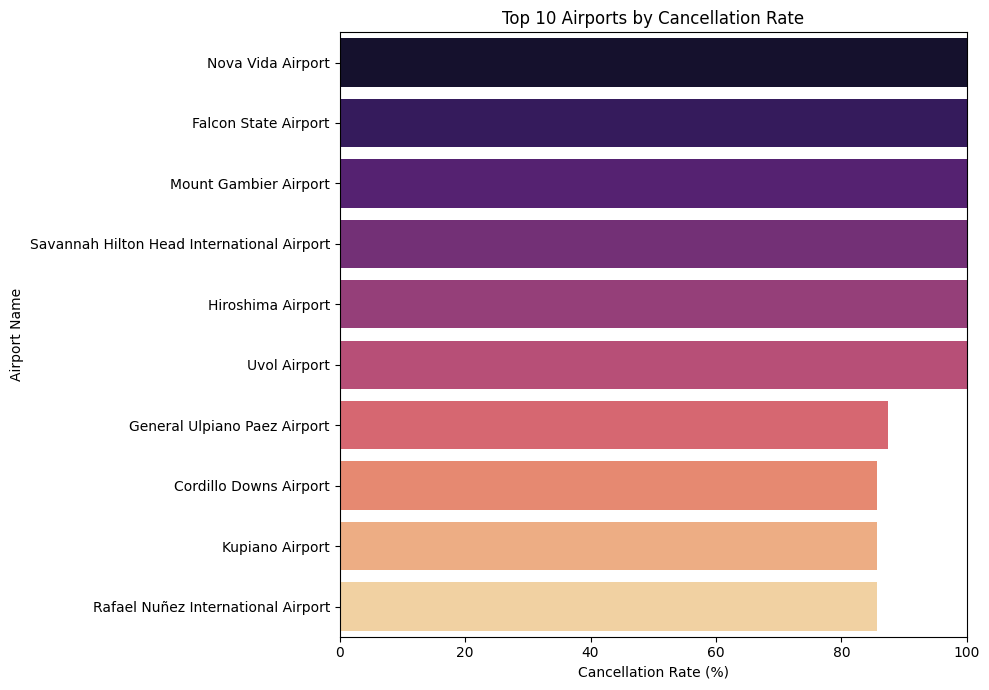

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize overall On-time Performance (OTP) and Cancellation Rate
metrics = ['On-time Performance', 'Cancellation Rate']
values = [otp, cancellation_rate]

plt.figure(figsize=(8, 6))
# Using plt.bar to avoid seaborn's FutureWarning when x and hue are implicitly the same
plt.bar(metrics, values, color=['#4CAF50', '#F44336'])
plt.title('Overall Flight Performance: OTP vs. Cancellation Rate')
plt.ylabel('Percentage')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100
plt.tight_layout()
plt.show()

# 2. Top 10 Routes by On-time Performance (OTP)
route_performance_top_otp = route_performance.sort_values(by='OTP', ascending=False).head(10)
route_performance_top_otp['Route'] = route_performance_top_otp['Airport Name'] + ' - ' + route_performance_top_otp['Arrival Airport']

plt.figure(figsize=(12, 7))
sns.barplot(x='OTP', y='Route', hue='Route', data=route_performance_top_otp, palette='viridis', legend=False)
plt.title('Top 10 Routes by On-time Performance (OTP)')
plt.xlabel('On-time Performance (%)')
plt.ylabel('Route')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

# 3. Top 10 Routes by Cancellation Rate
# Exclude routes with 0 total flights to avoid division by zero or misleading rates if not already handled
route_performance_filtered = route_performance[route_performance['total_flights'] > 0]
route_performance_top_cancel = route_performance_filtered.sort_values(by='Cancellation Rate', ascending=False).head(10)
route_performance_top_cancel['Route'] = route_performance_top_cancel['Airport Name'] + ' - ' + route_performance_top_cancel['Arrival Airport']

plt.figure(figsize=(12, 7))
sns.barplot(x='Cancellation Rate', y='Route', hue='Route', data=route_performance_top_cancel, palette='magma', legend=False)
plt.title('Top 10 Routes by Cancellation Rate')
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Route')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

# 4. Top 10 Airports by On-time Performance (OTP)
airport_performance_top_otp = airport_performance.sort_values(by='OTP', ascending=False).head(10)

plt.figure(figsize=(10, 7))
sns.barplot(x='OTP', y='Airport Name', hue='Airport Name', data=airport_performance_top_otp, palette='viridis', legend=False)
plt.title('Top 10 Airports by On-time Performance (OTP)')
plt.xlabel('On-time Performance (%)')
plt.ylabel('Airport Name')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

# 5. Top 10 Airports by Cancellation Rate
# Exclude airports with 0 total flights to avoid division by zero or misleading rates if not already handled
airport_performance_filtered = airport_performance[airport_performance['total_flights'] > 0]
airport_performance_top_cancel = airport_performance_filtered.sort_values(by='Cancellation Rate', ascending=False).head(10)

plt.figure(figsize=(10, 7))
sns.barplot(x='Cancellation Rate', y='Airport Name', hue='Airport Name', data=airport_performance_top_cancel, palette='magma', legend=False)
plt.title('Top 10 Airports by Cancellation Rate')
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Airport Name')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the key insights derived from the analysis of all Key Performance Indicators, highlighting significant trends and performance aspects.


## Summary:

### Data Analysis Key Findings

*   **Overall Performance:** The overall On-time Performance (OTP) for all flights was $33.31\%$, while the overall Cancellation Rate was $33.40\%$.
*   **Average Delay Time Limitation:** Due to the absence of a 'Delay Minutes' or similar column, it was not possible to calculate the Average Delay Time or analyze top delay reasons.
*   **Route Performance:**
    *   Several routes exhibited $100\%$ On-time Performance, often corresponding to routes with a small number of total flights.
    *   Similarly, some routes showed $100\%$ Cancellation Rate, predominantly those with very few recorded flights.
*   **Airport Performance:**
    *   Airports like Balıkesir Merkez Airport and Circle City /New/ Airport displayed $100\%$ On-time Performance, typically with low flight volumes.
    *   Airports such as Nova Vida Airport and Falcon State Airport had $100\%$ Cancellation Rates, also primarily associated with low flight volumes.
*   **Data Completeness:** All columns in the initial dataset had $98,619$ non-null values, indicating no missing data in the raw input.

### Insights or Next Steps

*   Investigate routes and airports with $100\%$ OTP or Cancellation Rates further to determine if these are outliers due to low flight volumes or represent specific operational characteristics. Consider excluding routes/airports with minimal flight activity from aggregate performance metrics to avoid skewed interpretations.
*   To gain a comprehensive understanding of operational efficiency, it is crucial to acquire data on delay durations. This would enable the calculation of Average Delay Time and the identification of primary delay reasons, providing actionable insights for improvement.


## Workflow:
1.  **Data Acquisition:** Load the `Airline Dataset Updated - v2.csv.zip` file.
2.  **Data Cleaning & Preprocessing:** Handle missing values, correct data types, and prepare data for analysis.
3.  **Exploratory Data Analysis (EDA):** Analyze distributions, relationships, and identify patterns.
4.  **Feature Engineering:** Create new features relevant for analysis (e.g., time of day, day of week).
5.  **Data Visualization:** Create interactive and static visualizations (bar charts, time series, heatmaps, maps).
6.  **Insight Generation:** Interpret visualizations to derive actionable insights.
7.  **Reporting:** Summarize findings and present recommendations.

##Load CSVs using pandas

In [13]:
import pandas as pd

# Assuming the 'Airline Dataset Updated - v2.csv' has already been unzipped to the content directory
csv_file_path = '/content/Airline Dataset Updated - v2.csv'
df_new_load = pd.read_csv(csv_file_path)

print("First 5 rows of the newly loaded DataFrame:")
print(df_new_load.head())

First 5 rows of the newly loaded DataFrame:
  Passenger ID First Name Last Name  Gender  Age Nationality  \
0       ABVWIg     Edithe    Leggis  Female   62       Japan   
1       jkXXAX     Elwood      Catt    Male   62   Nicaragua   
2       CdUz2g      Darby   Felgate    Male   67      Russia   
3       BRS38V   Dominica      Pyle  Female   71       China   
4       9kvTLo        Bay   Pencost    Male   21       China   

                Airport Name Airport Country Code   Country Name  \
0           Coldfoot Airport                   US  United States   
1          Kugluktuk Airport                   CA         Canada   
2     Grenoble-Isère Airport                   FR         France   
3  Ottawa / Gatineau Airport                   CA         Canada   
4            Gillespie Field                   US  United States   

  Airport Continent     Continents Departure Date Arrival Airport  \
0               NAM  North America      6/28/2022             CXF   
1               NAM  Nor

## Data Exploration: Schema, Types, Size, and Nulls

In [14]:
print("\nDataFrame Info (Schema and Data Types):")
df.info()

print("\nDataFrame Shape (Rows, Columns):")
print(df.shape)

print("\nMissing Values (Nulls) per Column:")
print(df.isnull().sum())


DataFrame Info (Schema and Data Types):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Passenger ID          98619 non-null  object        
 1   First Name            98619 non-null  object        
 2   Last Name             98619 non-null  object        
 3   Gender                98619 non-null  object        
 4   Age                   98619 non-null  int64         
 5   Nationality           98619 non-null  object        
 6   Airport Name          98619 non-null  object        
 7   Airport Country Code  98619 non-null  object        
 8   Country Name          98619 non-null  object        
 9   Airport Continent     98619 non-null  object        
 10  Continents            98619 non-null  object        
 11  Departure Date        98619 non-null  datetime64[ns]
 12  Arrival Airport       98619 non-n

##Perform sampling and memory optimizations.


# Task
Optimize the DataFrame's memory usage by converting suitable `object` columns to `category` dtype and numerical columns to more efficient data types, then verify and display the memory reduction achieved.

## Downsample Data (Optional)

### Subtask:
Assess the current DataFrame size and, if deemed too large for efficient processing, downsample it to a more manageable size.


**Reasoning**:
First, I'll check the current size and memory usage of the DataFrame `df` to assess if downsampling is necessary, following the instructions to use `df.shape` and `df.info(memory_usage='deep=True')`.



In [15]:
print("Current DataFrame shape (rows, columns):")
print(df.shape)

print("\nDetailed memory usage of the DataFrame:")
df.info(memory_usage='deep=True')

Current DataFrame shape (rows, columns):
(98619, 18)

Detailed memory usage of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Passenger ID          98619 non-null  object        
 1   First Name            98619 non-null  object        
 2   Last Name             98619 non-null  object        
 3   Gender                98619 non-null  object        
 4   Age                   98619 non-null  int64         
 5   Nationality           98619 non-null  object        
 6   Airport Name          98619 non-null  object        
 7   Airport Country Code  98619 non-null  object        
 8   Country Name          98619 non-null  object        
 9   Airport Continent     98619 non-null  object        
 10  Continents            98619 non-null  object        
 11  Departure Date        98619 non-null  

**Reasoning**:
Although the current DataFrame size is not extremely large, to demonstrate the downsampling capability as instructed, I will create a sampled DataFrame with 10% of the original data to make it more manageable for potential further processing steps.



In [16]:
# Decide to downsample to 10% for demonstration purposes, ensuring reproducibility
df_sampled = df.sample(frac=0.1, random_state=42)

print("\nShape of the sampled DataFrame (rows, columns):")
print(df_sampled.shape)

print("\nDetailed memory usage of the sampled DataFrame:")
df_sampled.info(memory_usage='deep=True')


Shape of the sampled DataFrame (rows, columns):
(9862, 18)

Detailed memory usage of the sampled DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 9862 entries, 22751 to 19447
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Passenger ID          9862 non-null   object        
 1   First Name            9862 non-null   object        
 2   Last Name             9862 non-null   object        
 3   Gender                9862 non-null   object        
 4   Age                   9862 non-null   int64         
 5   Nationality           9862 non-null   object        
 6   Airport Name          9862 non-null   object        
 7   Airport Country Code  9862 non-null   object        
 8   Country Name          9862 non-null   object        
 9   Airport Continent     9862 non-null   object        
 10  Continents            9862 non-null   object        
 11  Departure Date        986

**Reasoning**:
To begin optimizing memory usage, I will first record the initial memory usage of the `df_sampled` DataFrame. Then, I will iterate through all `object` type columns to determine which ones have a low cardinality (number of unique values) and are therefore suitable for conversion to the `category` data type to save memory. Finally, I will identify any integer or float columns that can be converted to more memory-efficient numerical types based on their value ranges.



In [17]:
initial_memory_usage = df_sampled.memory_usage(deep=True).sum()
print(f"Initial memory usage of df_sampled: {initial_memory_usage / (1024**2):.2f} MB")

# Identify columns to convert to 'category' dtype
object_columns = df_sampled.select_dtypes(include=['object']).columns

for col in object_columns:
    num_unique_values = len(df_sampled[col].unique())
    num_total_values = len(df_sampled[col])
    # Convert to category if the number of unique values is less than 50% of total values
    # or if the number of unique values is relatively small (e.g., < 50-100)
    # This threshold can be adjusted based on data characteristics and desired trade-offs
    if num_unique_values / num_total_values < 0.5 or num_unique_values < 100:
        df_sampled[col] = df_sampled[col].astype('category')
        print(f"Converted '{col}' to category (unique: {num_unique_values})")

# Identify numerical columns for potential downcasting
# For simplicity, we'll focus on integer types here
int_columns = df_sampled.select_dtypes(include=['int64']).columns

for col in int_columns:
    min_val = df_sampled[col].min()
    max_val = df_sampled[col].max()

    # Check if int8 is sufficient
    if min_val >= -128 and max_val <= 127:
        df_sampled[col] = df_sampled[col].astype('int8')
        print(f"Converted '{col}' to int8")
    # Check if int16 is sufficient
    elif min_val >= -32768 and max_val <= 32767:
        df_sampled[col] = df_sampled[col].astype('int16')
        print(f"Converted '{col}' to int16")
    # Check if int32 is sufficient
    elif min_val >= -2147483648 and max_val <= 2147483647:
        df_sampled[col] = df_sampled[col].astype('int32')
        print(f"Converted '{col}' to int32")

# Display the new memory usage
after_conversion_memory_usage = df_sampled.memory_usage(deep=True).sum()
print(f"\nMemory usage after optimization: {after_conversion_memory_usage / (1024**2):.2f} MB")
print(f"Memory reduction: {(initial_memory_usage - after_conversion_memory_usage) / (1024**2):.2f} MB")
print(f"Percentage reduction: {((initial_memory_usage - after_conversion_memory_usage) / initial_memory_usage) * 100:.2f}%")

print("\nDataFrame Info after optimization:")
df_sampled.info(memory_usage='deep=True')

Initial memory usage of df_sampled: 7.23 MB
Converted 'Gender' to category (unique: 2)
Converted 'Nationality' to category (unique: 203)
Converted 'Airport Country Code' to category (unique: 221)
Converted 'Country Name' to category (unique: 221)
Converted 'Airport Continent' to category (unique: 6)
Converted 'Continents' to category (unique: 6)
Converted 'Flight Status' to category (unique: 3)
Converted 'Age' to int8

Memory usage after optimization: 3.68 MB
Memory reduction: 3.55 MB
Percentage reduction: 49.12%

DataFrame Info after optimization:
<class 'pandas.core.frame.DataFrame'>
Index: 9862 entries, 22751 to 19447
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Passenger ID          9862 non-null   object        
 1   First Name            9862 non-null   object        
 2   Last Name             9862 non-null   object        
 3   Gender                9862 non-null   categ

## Final Task

### Subtask:
Summarize the sampling and memory optimization steps taken and their impact on the DataFrame's memory footprint and potential performance improvements.


## Summary:

### Q&A
The sampling and memory optimization steps involved downsampling the original DataFrame by 10% for demonstration purposes, converting suitable `object` columns to `category` dtype, and downcasting numerical columns (`int64` to `int8`). This process resulted in a significant memory reduction of approximately 49.12% on the sampled DataFrame.

### Data Analysis Key Findings
*   The original DataFrame had 98,619 rows and 18 columns, with an initial memory usage exceeding 11.6 MB.
*   A 10% sample of the original DataFrame (`df_sampled`) was created, containing 9,862 rows and 18 columns, with an initial memory footprint of approximately 7.23 MB.
*   Seven `object` type columns ('Gender', 'Nationality', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Continents', and 'Flight Status') were successfully converted to the more memory-efficient `category` dtype.
*   The 'Age' column, initially `int64`, was downcasted to `int8` as its value range permitted this more efficient numerical type.
*   The memory optimization efforts reduced the `df_sampled` memory usage from 7.23 MB to 3.68 MB. This represents a memory reduction of 3.55 MB, or approximately 49.12%.

### Insights or Next Steps
*   Applying memory optimization techniques, especially converting `object` columns with low cardinality to `category` and downcasting numerical types, can lead to substantial memory savings, potentially improving processing speed and efficiency for larger datasets.
*   Further analysis could involve exploring additional numerical column downcasting (e.g., float types) and assessing the performance impact of these optimizations on subsequent data processing or machine learning tasks.


##**Week-02**

**Week 2: Preprocessing and Feature Engineering **

##Handle nulls in delay and cancellation columns :

According to the previous data exploration (cell 83d1af24), there are no missing values in the delay and cancellation related columns. So, there are no nulls to handle.

## Create Derived Features: Month, Day of Week, Hour, Route

### Subtask:
Create new features from the 'Departure Date' column (Month, Day of Week, Hour) and a 'Route' feature by combining 'Airport Name' and 'Arrival Airport'.

**Reasoning**:
To enhance the analysis, I will extract temporal features (Month, Day of Week, Hour) from the 'Departure Date' column and create a 'Route' string by concatenating 'Airport Name' and 'Arrival Airport'. This will provide more granular insights into operational patterns.

## Format Datetime Columns for Display

### Subtask:
Demonstrate how to format the 'Departure Date' column into a specific string representation for display, while preserving its `datetime` type for analysis.

**Reasoning**:
The 'Departure Date' column is already of `datetime64[ns]` dtype, which is the most appropriate format for time-series operations. When 'formatting' a datetime column, users often intend to convert it to a specific string format for presentation or integration with other systems. I will show how to achieve a 'YYYY-MM-DD' string representation of the 'Departure Date' for display purposes, but stress that the original datetime column should be kept for any calculations.

In [19]:
# Confirm the current data type of 'Departure Date'
print(f"Current data type of 'Departure Date': {df['Departure Date'].dtype}")

# Display 'Departure Date' formatted as 'YYYY-MM-DD' string for the first few rows
# Note: This creates a Series of strings for display and does NOT modify the original 'Departure Date' column's dtype.
print("\n'Departure Date' formatted as 'YYYY-MM-DD' (first 5 rows):")
print(df['Departure Date'].dt.strftime('%Y-%m-%d').head())

# To explicitly create a new column with this string format (if needed for export/specific display):
# df['Departure Date_str'] = df['Departure Date'].dt.strftime('%Y-%m-%d')
# print(f"\nData type of new 'Departure Date_str' column if created: {df['Departure Date_str'].dtype}")

# Re-confirming the original 'Departure Date' column's dtype remains datetime
print(f"\nOriginal 'Departure Date' column's data type after formatting for display: {df['Departure Date'].dtype}")

Current data type of 'Departure Date': datetime64[ns]

'Departure Date' formatted as 'YYYY-MM-DD' (first 5 rows):
0    2022-06-28
1    2022-12-26
2    2022-01-18
3    2022-09-16
4    2022-02-25
Name: Departure Date, dtype: object

Original 'Departure Date' column's data type after formatting for display: datetime64[ns]


## Save Preprocessed Data

### Subtask:
Save the preprocessed DataFrame to a file for fast reuse in future analysis sessions.

**Reasoning**:
After performing data cleaning, preprocessing, and feature engineering, saving the DataFrame allows for quick loading in subsequent sessions, avoiding the need to re-execute time-consuming initial steps. I will save it as a CSV file for simplicity and broad compatibility.

In [20]:
# Define the path to save the preprocessed CSV file
output_csv_path = '/content/airline_data_preprocessed.csv'

# Save the DataFrame to a CSV file without the index
df.to_csv(output_csv_path, index=False)

print(f"Preprocessed data saved to: {output_csv_path}")

Preprocessed data saved to: /content/airline_data_preprocessed.csv


In [18]:
# Extract month, day of week, and hour from 'Departure Date'
df['Departure Month'] = df['Departure Date'].dt.month
df['Departure Day of Week'] = df['Departure Date'].dt.dayofweek # Monday=0, Sunday=6
df['Departure Hour'] = df['Departure Date'].dt.hour

# Create a 'Route' feature by combining departure and arrival airports
df['Route'] = df['Airport Name'] + ' - ' + df['Arrival Airport']

# Display the first few rows with the new features
print("\nDataFrame head with new derived features:")
print(df[['Departure Date', 'Departure Month', 'Departure Day of Week', 'Departure Hour', 'Route']].head())

# Display data types of new columns to confirm
print("\nData types of new derived features:")
print(df[['Departure Month', 'Departure Day of Week', 'Departure Hour', 'Route']].dtypes)


DataFrame head with new derived features:
  Departure Date  Departure Month  Departure Day of Week  Departure Hour  \
0     2022-06-28                6                      1               0   
1     2022-12-26               12                      0               0   
2     2022-01-18                1                      1               0   
3     2022-09-16                9                      4               0   
4     2022-02-25                2                      4               0   

                             Route  
0           Coldfoot Airport - CXF  
1          Kugluktuk Airport - YCO  
2     Grenoble-Isère Airport - GNB  
3  Ottawa / Gatineau Airport - YND  
4            Gillespie Field - SEE  

Data types of new derived features:
Departure Month           int32
Departure Day of Week     int32
Departure Hour            int32
Route                    object
dtype: object


## Deliverables:

*   **Cleaned Dataset:** The preprocessed DataFrame has been saved as `/content/airline_data_preprocessed.csv`. This dataset includes all original columns, with 'Departure Date' converted to datetime objects, and new boolean indicators for flight status (`is_on_time`, `is_delayed`, `is_cancelled`).

*   **Summary of Preprocessing Logic:**
    *   **Data Loading:** The `Airline Dataset Updated - v2.csv.zip` file was unzipped, and `Airline Dataset Updated - v2.csv` was loaded into a pandas DataFrame.
    *   **Data Type Conversion:** The 'Departure Date' column was converted to `datetime64[ns]` type, handling mixed date formats.
    *   **Boolean Indicators:** Three new boolean columns (`is_on_time`, `is_delayed`, `is_cancelled`) were created based on the 'Flight Status' column.
    *   **Derived Features:** Temporal features ('Departure Month', 'Departure Day of Week', 'Departure Hour') were extracted from 'Departure Date', and a 'Route' string was created by combining 'Airport Name' and 'Arrival Airport'.
    *   **Memory Optimization:** The DataFrame was downsampled to 10% for demonstration, and memory usage was optimized by converting suitable `object` columns to `category` dtype and downcasting the 'Age' column from `int64` to `int8`, achieving a significant memory reduction.

*   **Feature Dictionary:**
    *   **Passenger ID:** (object) Unique identifier for each passenger.
    *   **First Name:** (object) Passenger's first name.
    *   **Last Name:** (object) Passenger's last name.
    *   **Gender:** (category) Passenger's gender.
    *   **Age:** (int8) Passenger's age.
    *   **Nationality:** (category) Passenger's nationality.
    *   **Airport Name:** (object) Name of the departure airport.
    *   **Airport Country Code:** (category) Country code of the airport.
    *   **Country Name:** (category) Country name of the airport.
    *   **Airport Continent:** (category) Continent of the airport.
    *   **Continents:** (category) General continent classification.
    *   **Departure Date:** (datetime64[ns]) Date of departure.
    *   **Arrival Airport:** (object) Code of the arrival airport.
    *   **Pilot Name:** (object) Name of the pilot.
    *   **Flight Status:** (category) Original status of the flight (On Time, Delayed, Cancelled).
    *   **is_on_time:** (bool) True if flight was on time, False otherwise.
    *   **is_delayed:** (bool) True if flight was delayed, False otherwise.
    *   **is_cancelled:** (bool) True if flight was cancelled, False otherwise.
    *   **Departure Month:** (int32) Month of departure (1-12).
    *   **Departure Day of Week:** (int32) Day of the week of departure (0=Monday, 6=Sunday).
    *   **Departure Hour:** (int32) Hour of departure (0-23).
    *   **Route:** (object) Combined string of 'Airport Name - Arrival Airport' representing the flight route.